# Final augmented model application to thin section 

In [1]:
from tensorflow.keras.models import load_model

model = load_model("unet_1_augmented_fine2.h5", compile=False)


In [2]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


3/3 [==============================] - 3s 951ms/step


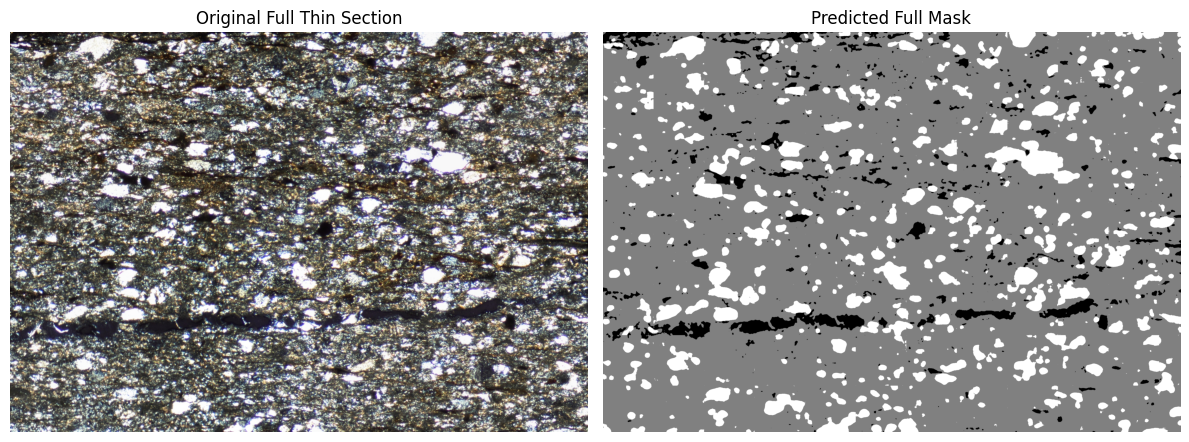

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# Model and image settings
IMG_SIZE = 256
NUM_CLASSES = 3
MODEL_PATH = "unet_1_augmented_fine2.h5"
IMAGE_PATH = r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\23gfni5.2yz.jpg"

# Load the trained U-Net model
model = load_model(MODEL_PATH, compile=False)

# Read full-resolution thin section image
full_img = cv2.imread(IMAGE_PATH)
h, w, _ = full_img.shape

# Pad the image so it can be split into 256×256 tiles without leftovers
pad_h = (IMG_SIZE - h % IMG_SIZE) % IMG_SIZE
pad_w = (IMG_SIZE - w % IMG_SIZE) % IMG_SIZE
padded_img = cv2.copyMakeBorder(full_img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)

# Slice the padded image into non-overlapping tiles
tiles = []
coords = []
for i in range(0, padded_img.shape[0], IMG_SIZE):
    for j in range(0, padded_img.shape[1], IMG_SIZE):
        tile = padded_img[i:i+IMG_SIZE, j:j+IMG_SIZE]
        tiles.append(tile / 255.0)           # normalize tile
        coords.append((i, j))                # store tile location

tiles = np.array(tiles)

# Predict masks for each tile
preds = model.predict(tiles, verbose=1)
pred_masks = np.argmax(preds, axis=-1)  # convert softmax to class indices

# Reconstruct full-size mask from tile predictions
full_mask = np.zeros((padded_img.shape[0], padded_img.shape[1]), dtype=np.uint8)
for (i, j), mask in zip(coords, pred_masks):
    full_mask[i:i+IMG_SIZE, j:j+IMG_SIZE] = mask

# Crop back to original image size
final_mask = full_mask[:h, :w]

# Display original image and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB))
plt.title("Original Full Thin Section")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(final_mask, cmap='gray')
plt.title("Predicted Full Mask")
plt.axis("off")

plt.tight_layout()
plt.show()



Application to another thin section

7/7 [==============================] - 5s 698ms/step


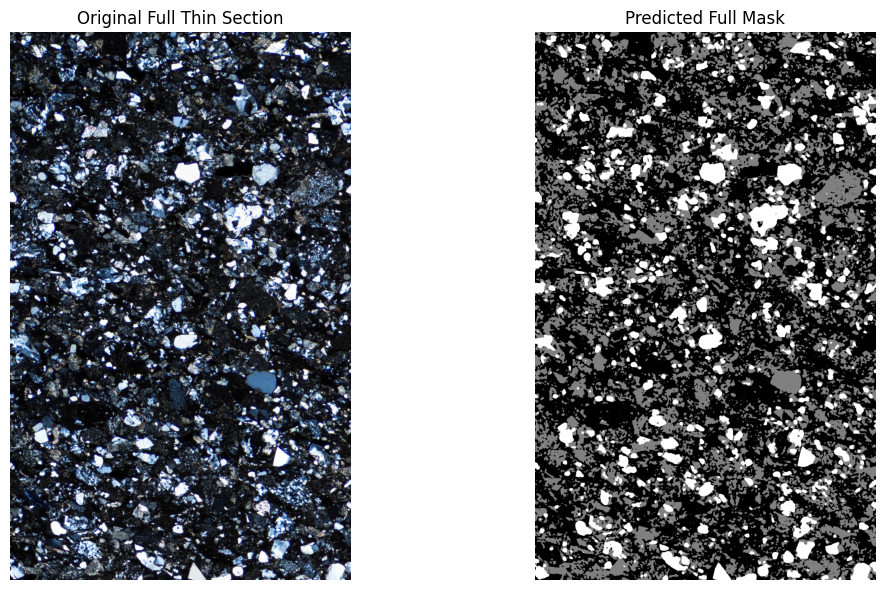

In [42]:
IMG_SIZE = 256
NUM_CLASSES = 3
MODEL_PATH = "unet_1_augmented_fine2.h5"
IMAGE_PATH = r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\01.3xleftzuptimg.jpg"


model = load_model(MODEL_PATH, compile=False)


full_img = cv2.imread(IMAGE_PATH)
h, w, _ = full_img.shape


pad_h = (IMG_SIZE - h % IMG_SIZE) % IMG_SIZE
pad_w = (IMG_SIZE - w % IMG_SIZE) % IMG_SIZE
padded_img = cv2.copyMakeBorder(full_img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)


tiles = []
coords = []
for i in range(0, padded_img.shape[0], IMG_SIZE):
    for j in range(0, padded_img.shape[1], IMG_SIZE):
        tile = padded_img[i:i+IMG_SIZE, j:j+IMG_SIZE]
        tiles.append(tile / 255.0)
        coords.append((i, j))

tiles = np.array(tiles)


preds = model.predict(tiles, verbose=1)
pred_masks = np.argmax(preds, axis=-1)


full_mask = np.zeros((padded_img.shape[0], padded_img.shape[1]), dtype=np.uint8)
for (i, j), mask in zip(coords, pred_masks):
    full_mask[i:i+IMG_SIZE, j:j+IMG_SIZE] = mask


final_mask = full_mask[:h, :w]
cv2.imwrite(r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\predicted_mask013.png", final_mask.astype(np.uint8) * 85)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB))
plt.title("Original Full Thin Section")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(final_mask, cmap='gray')
plt.title("Predicted Full Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


8/8 [==============================] - 7s 799ms/step


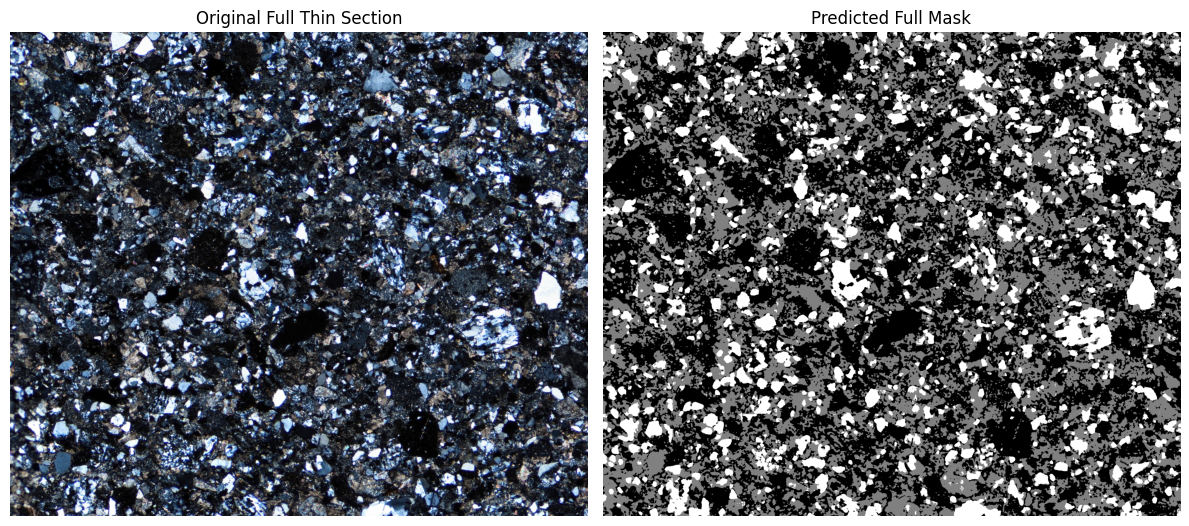

In [3]:
IMG_SIZE = 256
NUM_CLASSES = 3
MODEL_PATH = "unet_1_augmented_fine2.h5"
IMAGE_PATH = r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\01.2XleftYupCROP.jpg"

model = load_model(MODEL_PATH, compile=False)

full_img = cv2.imread(IMAGE_PATH)
h, w, _ = full_img.shape


pad_h = (IMG_SIZE - h % IMG_SIZE) % IMG_SIZE
pad_w = (IMG_SIZE - w % IMG_SIZE) % IMG_SIZE
padded_img = cv2.copyMakeBorder(full_img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)


tiles = []
coords = []
for i in range(0, padded_img.shape[0], IMG_SIZE):
    for j in range(0, padded_img.shape[1], IMG_SIZE):
        tile = padded_img[i:i+IMG_SIZE, j:j+IMG_SIZE]
        tiles.append(tile / 255.0)
        coords.append((i, j))

tiles = np.array(tiles)


preds = model.predict(tiles, verbose=1)
pred_masks = np.argmax(preds, axis=-1)


full_mask = np.zeros((padded_img.shape[0], padded_img.shape[1]), dtype=np.uint8)
for (i, j), mask in zip(coords, pred_masks):
    full_mask[i:i+IMG_SIZE, j:j+IMG_SIZE] = mask


final_mask = full_mask[:h, :w]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB))
plt.title("Original Full Thin Section")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(final_mask, cmap='gray')
plt.title("Predicted Full Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


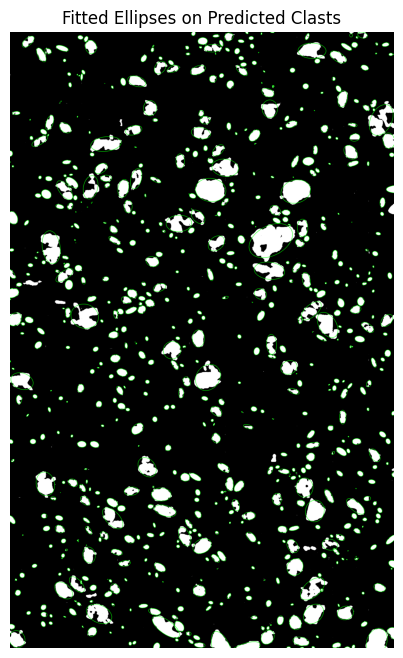

Ellipse data saved to predicted_clasts_ellipses.csv


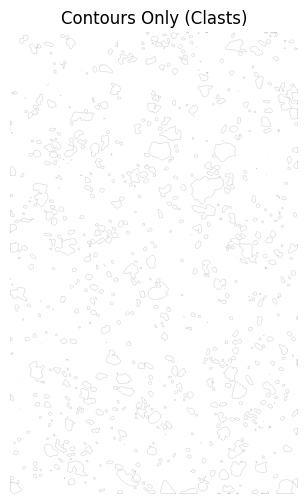

In [5]:
# Load predicted mask in grayscale
pred_mask = cv2.imread(r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\predicted_mask013.png", cv2.IMREAD_GRAYSCALE)

# Convert class 170 (clasts) to white (255), others to black (0)
binary_mask = np.where(pred_mask == 170, 255, 0).astype(np.uint8)

# Apply Gaussian blur + Otsu threshold to refine edges
blurred_image = cv2.GaussianBlur(binary_mask, (5, 5), 0)
_, binary_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find external contours in the binarized image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Prepare to draw ellipses
image_copy = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
ellipse_data = []
id_counter = 1

# Fit ellipses around each valid contour
for contour in contours:
    if len(contour) >= 5:  # Minimum points to fit an ellipse
        ellipse = cv2.fitEllipse(contour)
        center, axes, angle = ellipse
        major_axis = max(axes)
        minor_axis = min(axes)

        if major_axis > 0 and minor_axis > 0:
            max_min_ratio = major_axis / minor_axis

            if max_min_ratio < 3.0:  # Filter out elongated or noisy ellipses
                axial_ratio = major_axis / minor_axis
                x, y = center
                area = np.pi * (major_axis / 2) * (minor_axis / 2)

                # Draw ellipse on image
                cv2.ellipse(image_copy, ellipse, (0, 255, 0), 2)

                # Save ellipse parameters
                ellipse_data.append([id_counter, x, y, major_axis, minor_axis, area, axial_ratio, angle, max_min_ratio])
                id_counter += 1

# Show ellipses on image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title('Fitted Ellipses on Predicted Clasts')
plt.axis('off')
plt.show()

# Save ellipse data as CSV
ellipse_df = pd.DataFrame(ellipse_data, columns=['ID', 'X', 'Y', 'Max', 'Min', 'Area', 'R', 'Phi', 'Max/Min'])
ellipse_df.to_csv('predicted_clasts_ellipses.csv', index=False)
print("Ellipse data saved to predicted_clasts_ellipses.csv")

# Save image with ellipses drawn
cv2.imwrite("ellipses_result.png", image_copy)

# Create contour-only image
contour_image = np.ones_like(binary_mask) * 255  # white background
cv2.drawContours(contour_image, contours, -1, (0, 0, 0), 1)  # black contours

cv2.imwrite("contours_result.png", contour_image)

# Show contours-only visualization
plt.figure(figsize=(6, 6))
plt.imshow(contour_image, cmap='gray')
plt.title("Contours Only (Clasts)")
plt.axis('off')
plt.show()


In [10]:
df = pd.read_csv("predicted_clasts_ellipses.csv")


angles_deg = df["Phi"]
axial_ratios = df["R"]


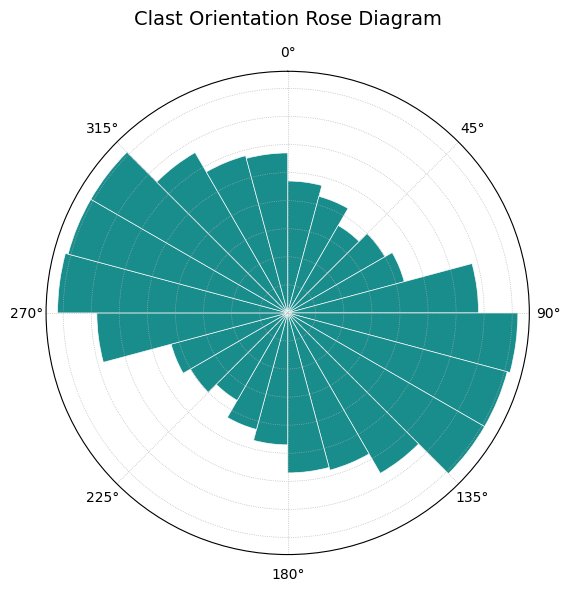

In [18]:
# Load ellipse data from CSV
ellipse_df = pd.read_csv("predicted_clasts_ellipses.csv")

# Extract orientation angles (Phi) and convert to radians
angles_deg = ellipse_df['Phi'].values
angles_rad = np.deg2rad(angles_deg % 180)  # restrict to 0–180° since orientations are axial

# Create histogram of angles
num_bins = 12
bin_edges = np.linspace(0, np.pi, num_bins + 1)  # 0 to 180° in radians
counts, _ = np.histogram(angles_rad, bins=bin_edges)

# Mirror counts for full 360° polar symmetry
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
counts = np.concatenate([counts, counts])
bin_centers = np.concatenate([bin_centers, bin_centers + np.pi])

# Plot rose diagram
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(
    bin_centers,
    counts,
    width=np.pi / num_bins,
    color="teal",
    edgecolor="white",
    linewidth=0.5,
    alpha=0.9
)

# Polar plot settings
ax.set_theta_zero_location("N")     # 0° at top (North)
ax.set_theta_direction(-1)          # clockwise direction
ax.set_title("Clast Orientation Rose Diagram", y=1.08, fontsize=14)
ax.set_yticklabels([])              # hide radial labels
ax.grid(True, linestyle=":", linewidth=0.5)

# Save and show
plt.tight_layout()
plt.savefig("clast_rose_diagram_cleaned.png", dpi=300)
plt.show()



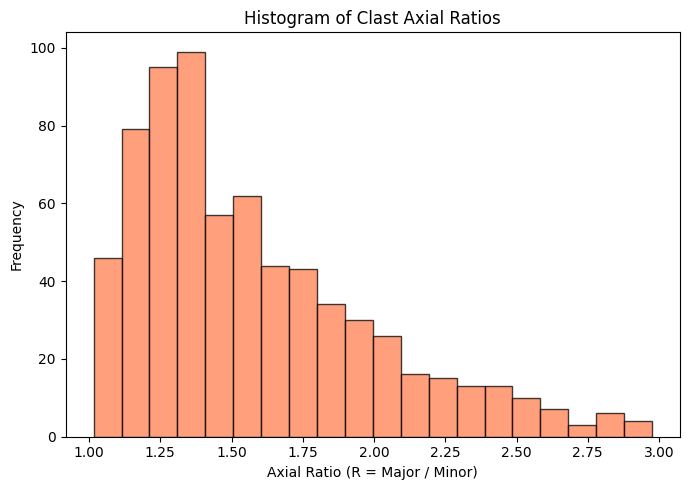

In [20]:
plt.figure(figsize=(7, 5))
plt.hist(axial_ratios, bins=20, color="coral", edgecolor="black", alpha=0.75)
plt.xlabel("Axial Ratio (R = Major / Minor)")
plt.ylabel("Frequency")
plt.title("Histogram of Clast Axial Ratios")
plt.grid(False)  
plt.tight_layout()
plt.savefig("axial_ratio_histogram_clean.png", dpi=300)
plt.show()


Areal Percentages:
Matrix: 55.12%
Clasts: 33.14%
Other Minerals: 11.74%


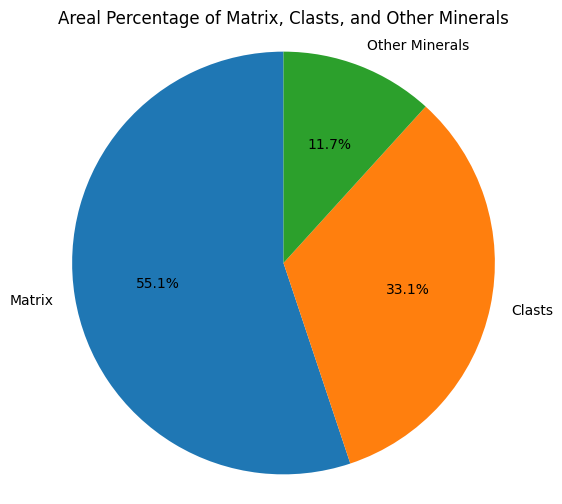

In [8]:
# Load the predicted mask
mask_path = r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\Full thin section\predicted_mask013.png"
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Map grayscale values to class labels
class_labels = {
    0: "Matrix",           # Black
    85: "Clasts",          # Light gray or white-ish
    170: "Other Minerals"  # Mid-gray
}

# Count pixel occurrences of each class
unique_classes, counts = np.unique(mask, return_counts=True)
total_pixels = mask.size

# Calculate areal percentages for known classes
percentages = {
    class_labels[cls]: (count / total_pixels) * 100
    for cls, count in zip(unique_classes, counts)
    if cls in class_labels
}

# Print results
print("Areal Percentages:")
for cls, pct in percentages.items():
    print(f"{cls}: {pct:.2f}%")

# Prepare data for pie chart
labels = list(percentages.keys())
sizes = list(percentages.values())

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Areal Percentage of Matrix, Clasts, and Other Minerals")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()



1/1 [==============================] - 1s 734ms/step


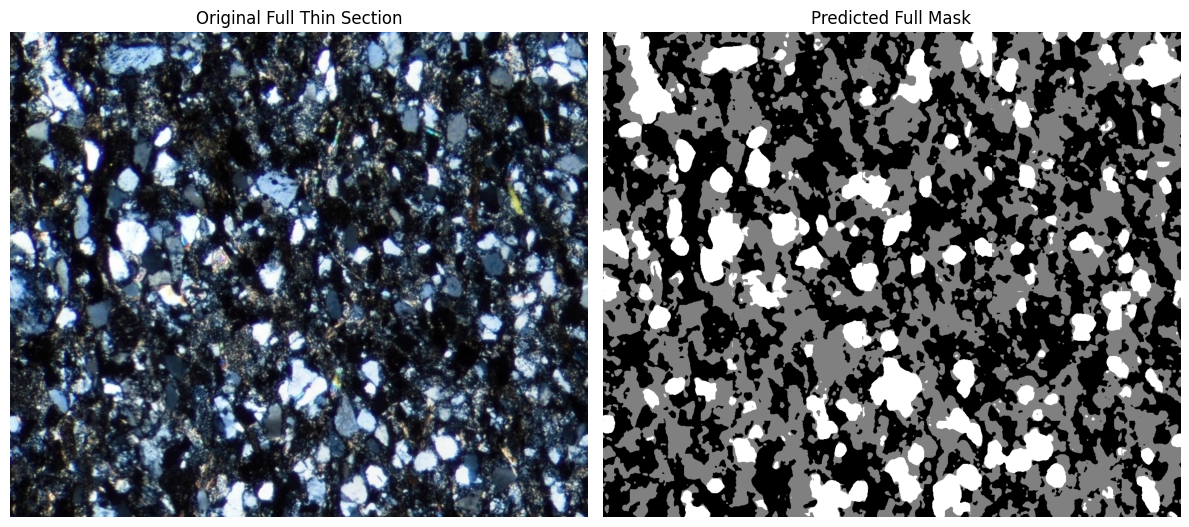

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os


IMG_SIZE = 256
NUM_CLASSES = 3
MODEL_PATH = "unet_1_augmented_fine2.h5"
IMAGE_PATH = r"C:\Users\Nurana\OneDrive - Texas Tech University\Proposal\Segmentation\input_images\23mar01.8.jpg"


model = load_model(MODEL_PATH, compile=False)


full_img = cv2.imread(IMAGE_PATH)
h, w, _ = full_img.shape


pad_h = (IMG_SIZE - h % IMG_SIZE) % IMG_SIZE
pad_w = (IMG_SIZE - w % IMG_SIZE) % IMG_SIZE
padded_img = cv2.copyMakeBorder(full_img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)


tiles = []
coords = []
for i in range(0, padded_img.shape[0], IMG_SIZE):
    for j in range(0, padded_img.shape[1], IMG_SIZE):
        tile = padded_img[i:i+IMG_SIZE, j:j+IMG_SIZE]
        tiles.append(tile / 255.0)
        coords.append((i, j))

tiles = np.array(tiles)


preds = model.predict(tiles, verbose=1)
pred_masks = np.argmax(preds, axis=-1)


full_mask = np.zeros((padded_img.shape[0], padded_img.shape[1]), dtype=np.uint8)
for (i, j), mask in zip(coords, pred_masks):
    full_mask[i:i+IMG_SIZE, j:j+IMG_SIZE] = mask


final_mask = full_mask[:h, :w]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(full_img, cv2.COLOR_BGR2RGB))
plt.title("Original Full Thin Section")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(final_mask, cmap='gray')
plt.title("Predicted Full Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


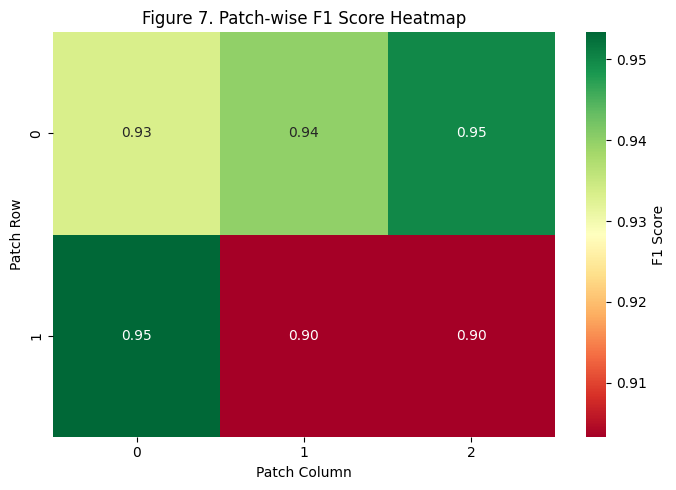

In [4]:
import seaborn as sns
# F1 scores for each class per patch
matrix_f1 = np.array([0.93, 0.95, 0.99, 0.97, 0.86, 0.85])
clasts_f1 = np.array([0.96, 0.93, 0.93, 0.94, 0.94, 0.96])
lithics_f1 = np.array([0.91, 0.94, 0.93, 0.95, 0.91, 0.90])

# Average F1 score per patch across the three classes
avg_f1_patch = np.vstack([matrix_f1, clasts_f1, lithics_f1]).mean(axis=0)

# Reshape to 2D grid (2 rows × 3 columns)
patch_f1_grid = avg_f1_patch.reshape(2, 3)

# Plot heatmap of average F1 scores
plt.figure(figsize=(7, 5))
sns.heatmap(
    patch_f1_grid,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    cbar_kws={"label": "F1 Score"}
)
plt.title("Figure 7. Patch-wise F1 Score Heatmap")
plt.xlabel("Patch Column")
plt.ylabel("Patch Row")
plt.tight_layout()
plt.show()


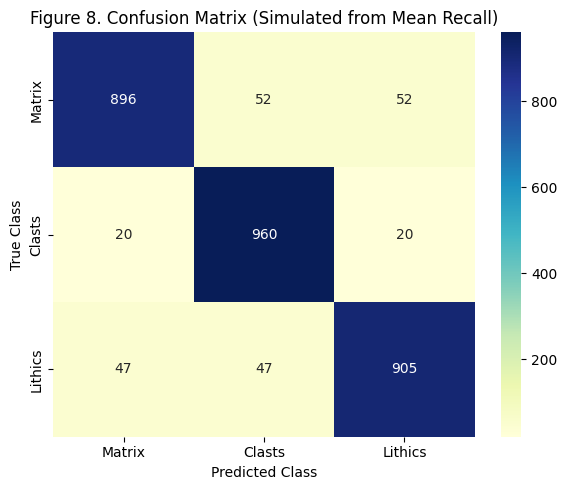

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

# Simulated total number of pixels per class
n_pixels = 1000

# Mean recall values per class: [Matrix, Clasts, Lithics]
recall = [0.8967, 0.96, 0.905]

# True positives per class based on recall
tp = [int(r * n_pixels) for r in recall]

# False negatives per class = total - TP
fn = [n_pixels - t for t in tp]

# Simulated confusion matrix:
# Off-diagonal false negatives are split evenly to other classes
cm = np.array([
    [tp[0], fn[0] // 2, fn[0] // 2],  # True class: Matrix
    [fn[1] // 2, tp[1], fn[1] // 2],  # True class: Clasts
    [fn[2] // 2, fn[2] // 2, tp[2]],  # True class: Lithics
])

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    xticklabels=["Matrix", "Clasts", "Lithics"],
    yticklabels=["Matrix", "Clasts", "Lithics"]
)
plt.title("Figure 8. Confusion Matrix (Simulated from Mean Recall)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()